In [1]:
import pandas as pd
import numpy as np

In [2]:
res = pd.read_csv('result.csv').drop(columns = ['Unnamed: 0'])

In [3]:
res_all = res.loc[res['Features'] == 'All']

In [4]:
res_MRT = res.loc[res['Features'] == 'MRT']

In [5]:
res_clinical = res.loc[res['Features'] == 'Clinical']

In [9]:
res

,Type,Dataset_number,Features,log_loss,ACC,ROC AUC,TPR,FPR,RMSE,R2
0,XGBoost,0,All,0.206226,0.919922,0.973581,15.0,5.4,28.211556,0.233777
1,XGBoost,1,All,0.204009,0.914989,0.975024,10.8,7.7,30.674947,0.158669
2,XGBoost,2,All,0.215509,0.913878,0.968944,13.3,6.9,22.936985,0.282686
3,XGBoost,0,Clinical,0.200860,0.919584,0.974276,14.4,5.7,28.437699,0.221444
4,XGBoost,1,Clinical,0.200548,0.916092,0.976212,10.6,7.6,26.665476,0.364233
5,XGBoost,2,Clinical,0.220621,0.912218,0.966939,13.6,7.1,23.986838,0.215519
6,XGBoost,0,MRT,0.360937,0.842341,0.895312,35.2,8.6,40.560265,-0.583809
7,XGBoost,1,MRT,0.379400,0.836182,0.883590,33.8,10.2,35.200108,-0.107867
8,XGBoost,2,MRT,0.394997,0.811367,0.875927,30.0,14.9,31.722007,-0.372012


In [8]:
res.groupby(['Features','Type']).mean()

,,Dataset_number,log_loss,ACC,ROC AUC,TPR,FPR,RMSE,R2
Features,Type,,,,,,,,
All,XGBoost,1,0.208581,0.916263,0.972516,13.033333,6.666667,27.274496,0.225044
Clinical,XGBoost,1,0.207343,0.915965,0.972476,12.866667,6.800000,26.363338,0.267065
MRT,XGBoost,1,0.378445,0.829963,0.884943,33.000000,11.233333,35.827460,-0.354562


## Усредним результаты полученные при использовании регрессионной модели

In [197]:
def get_mean(iter, feature, Type, Datasets_amount):
    dfs = []
    for dataset_num in range(Datasets_amount):
        for i in range(iter):
            if Type == 'reg':
                dfs.append(pd.read_csv('results/XGBoost_reg/{}_{}_{}.csv'.format(feature, dataset_num, i)).drop(columns = ['Unnamed: 0']))
            else:
                dfs.append(pd.read_csv('results/XGBoost/{}_{}_{}.csv'.format(feature, dataset_num, i)).drop(columns = ['Unnamed: 0']))
    return dfs

In [198]:
df = dict()
for Type in ['Class', 'reg']:
    df[Type] = dict()
    for feature in ['All', 'Clinical', 'MRT']:
        if Type == 'Class':
            df[Type][feature] = get_mean(5, feature, Type, 3)
        else:
            df[Type][feature] = get_mean(1, feature, Type, 3)

In [194]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')

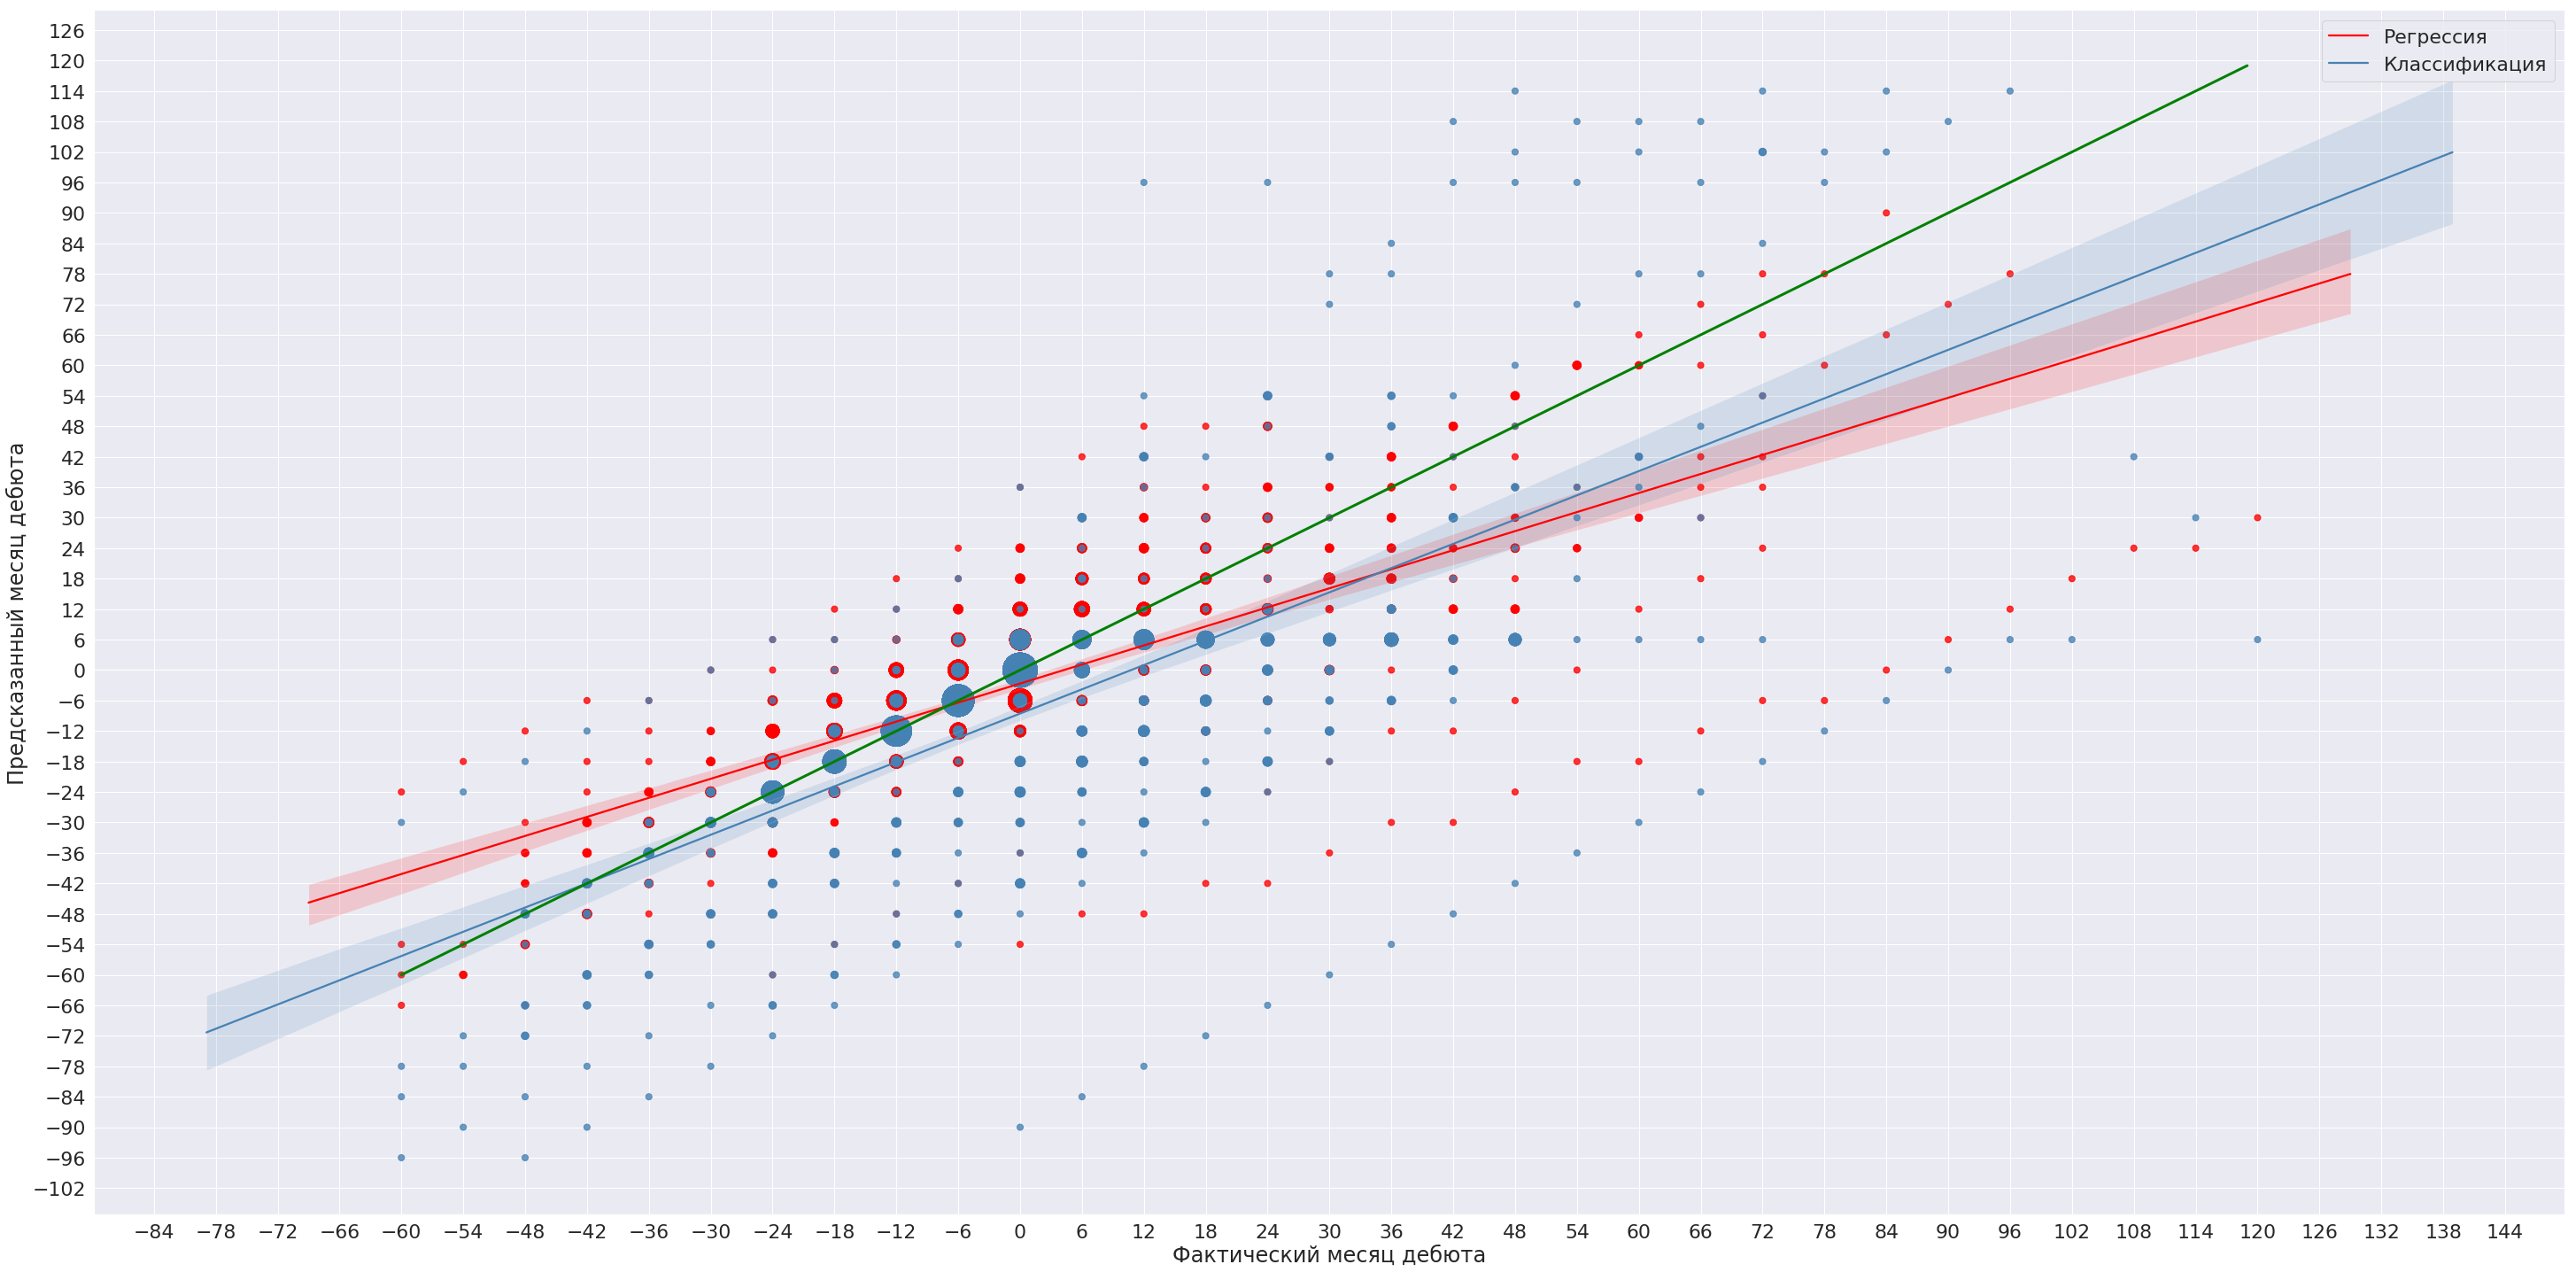

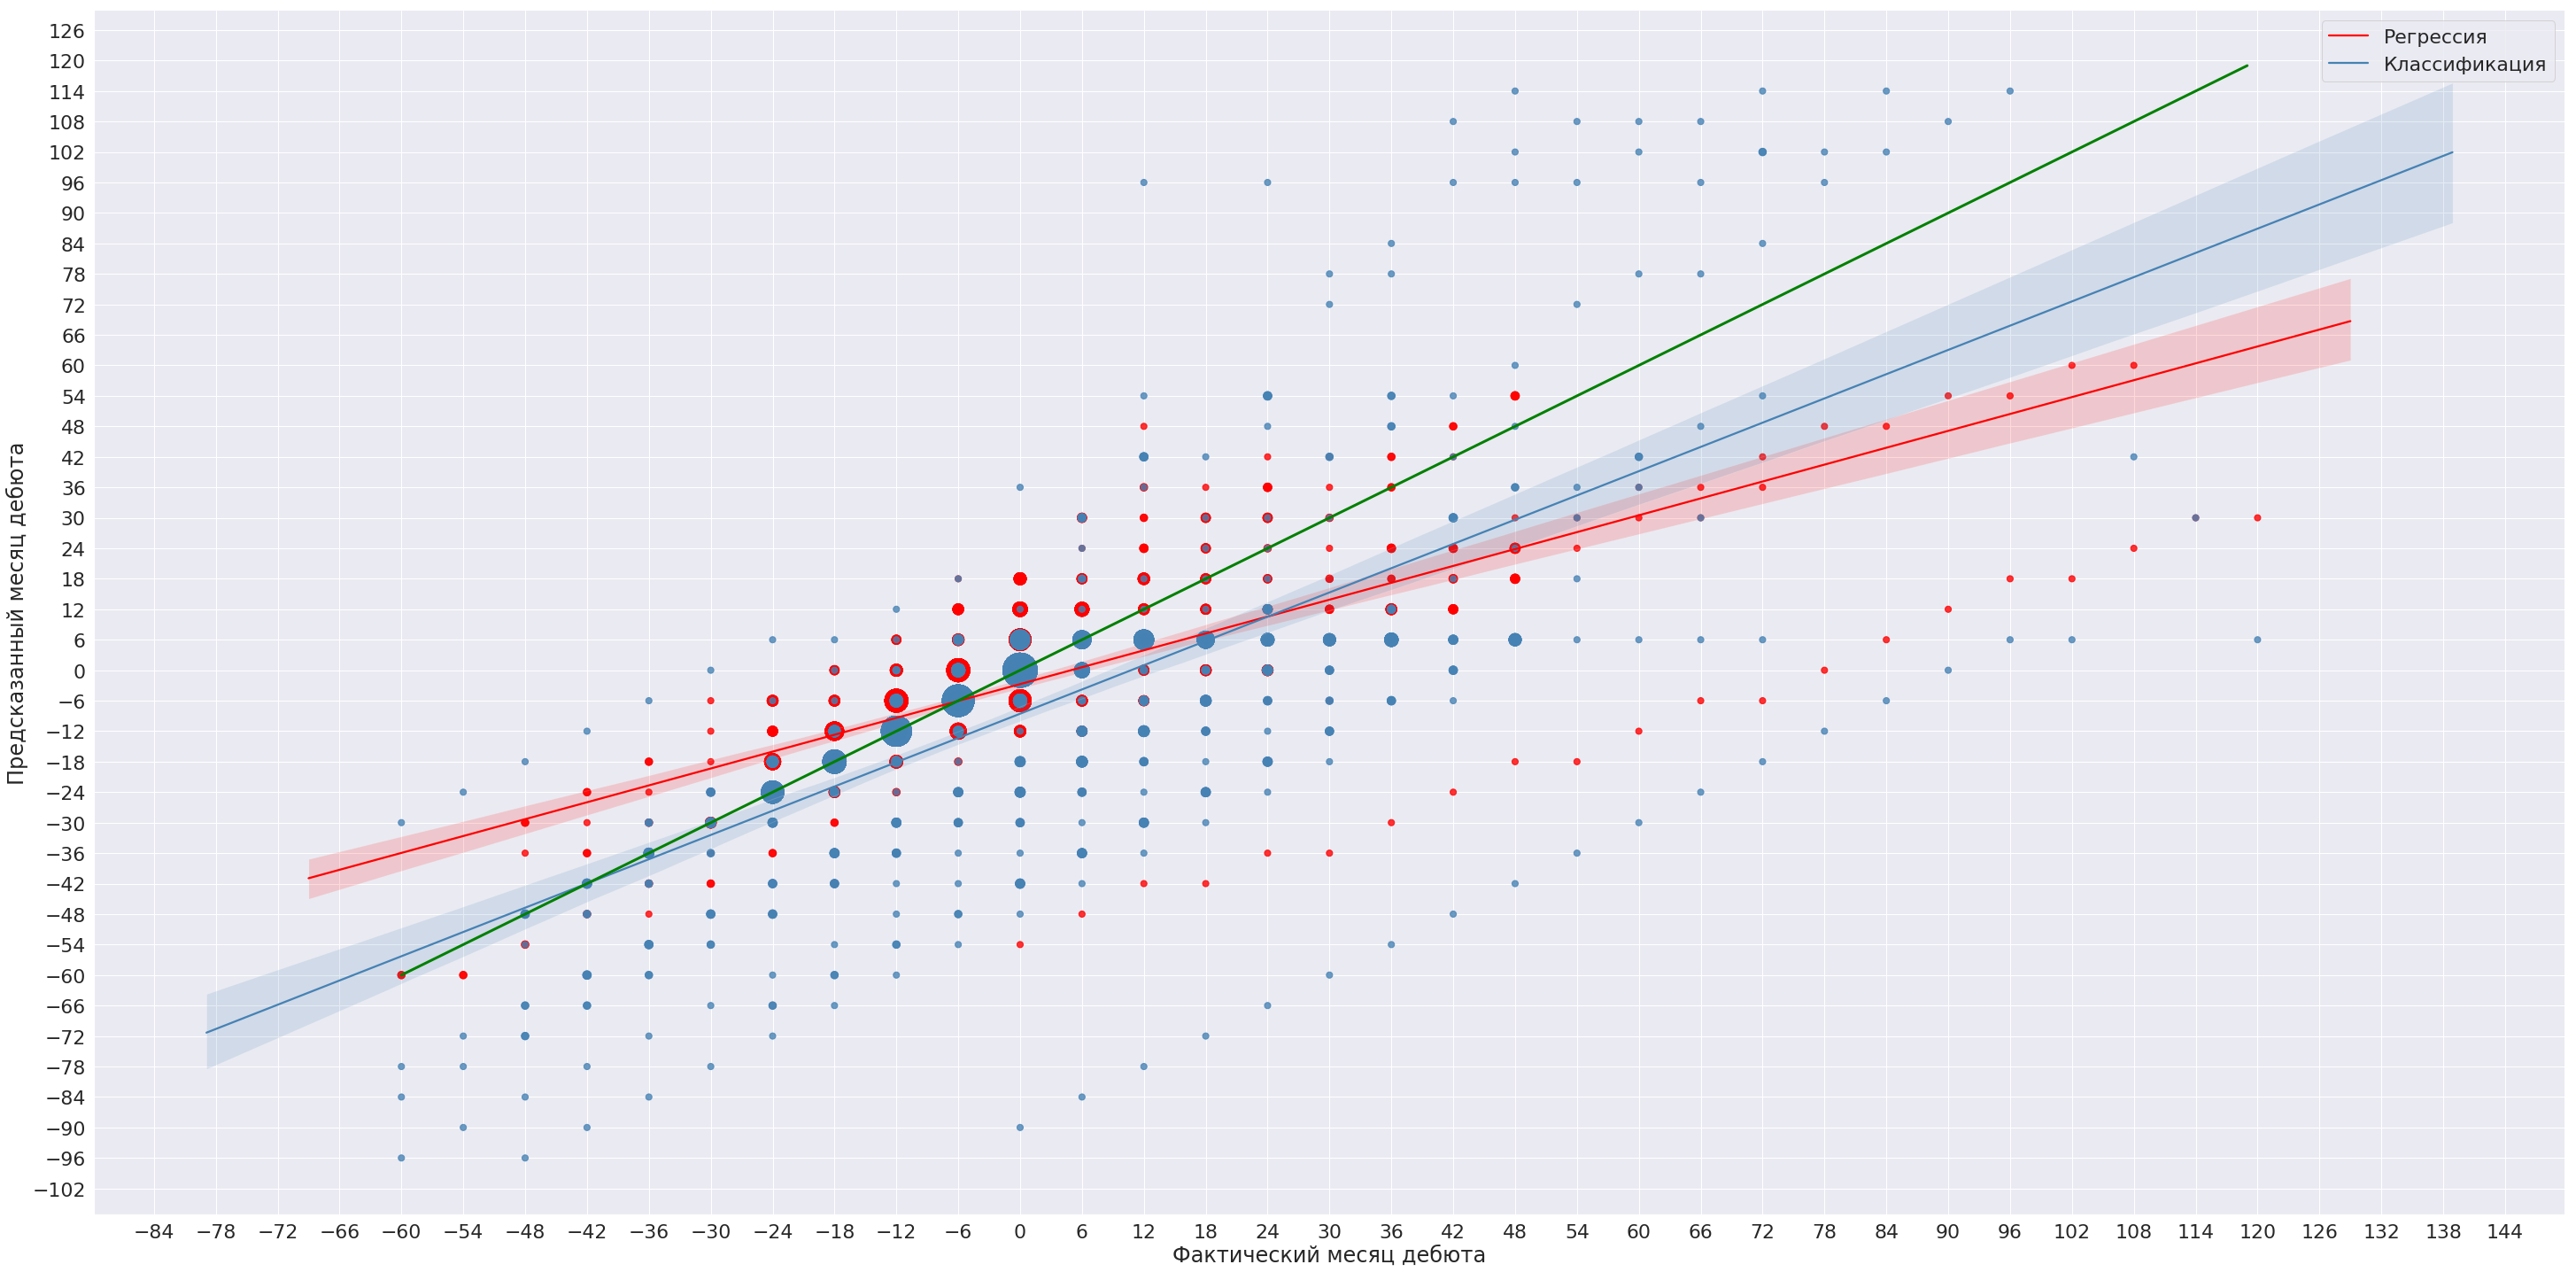

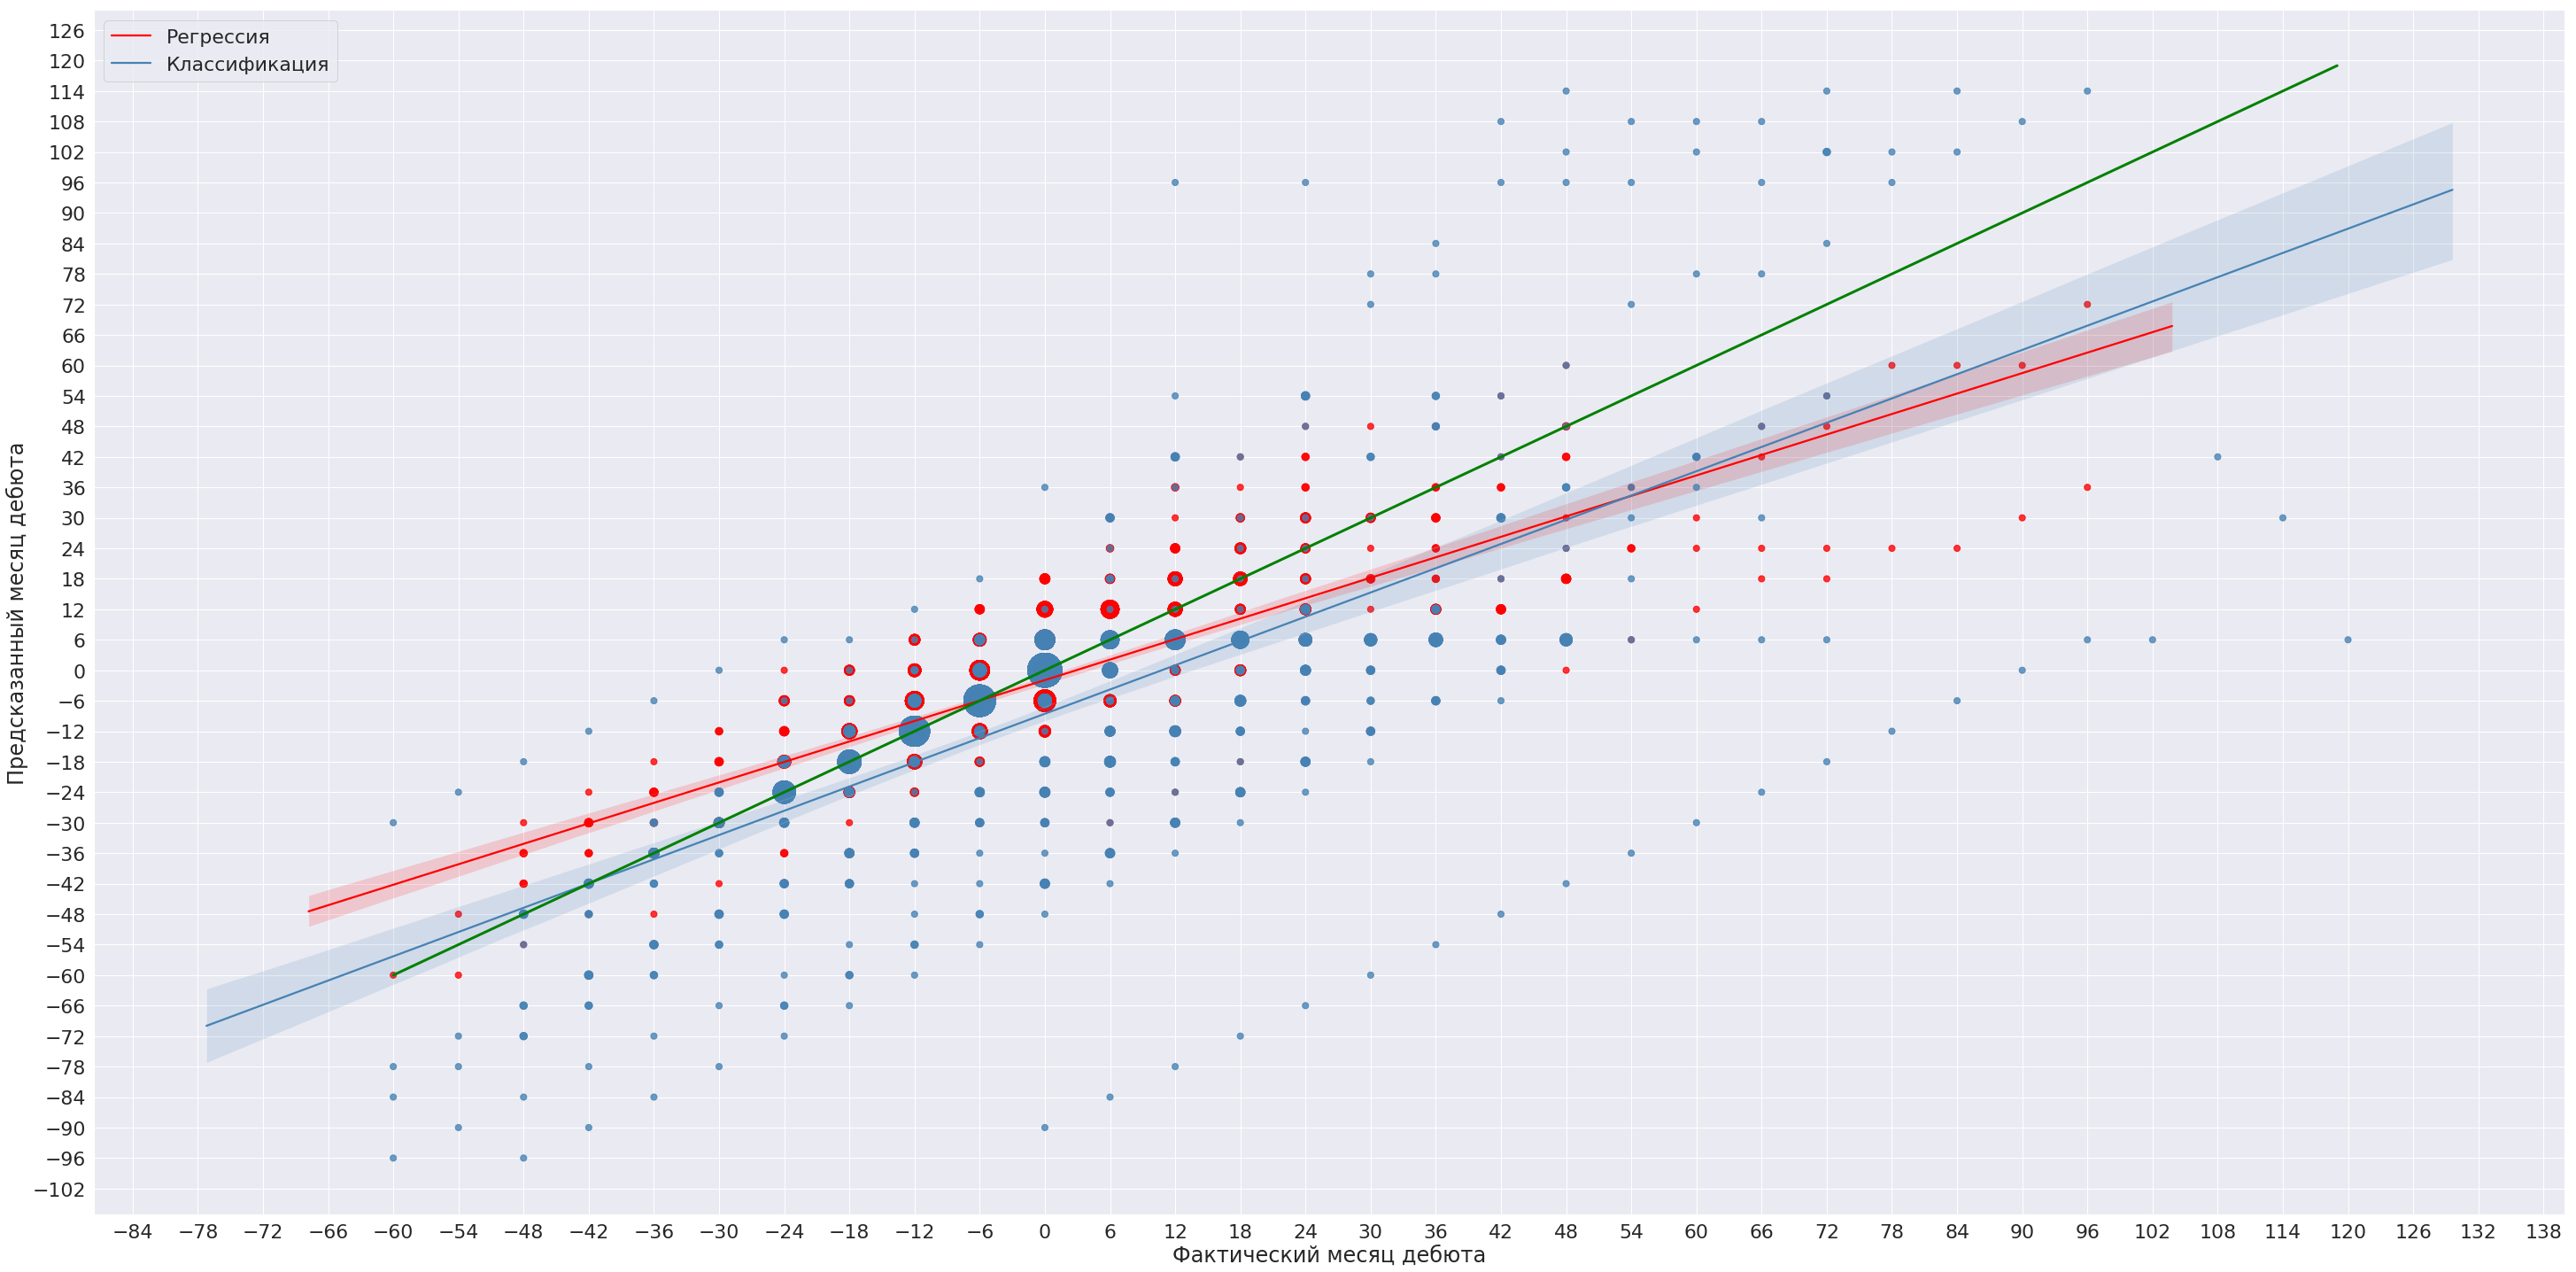

In [205]:
import matplotlib.ticker as ticker

def get_area(pred, act):
    res = df_class.loc[df_class['Предсказанный месяц дебюта'] == pred].loc[df_class['Фактический месяц дебюта'] == act].shape[0]
    return res

for dataset_num in range(Datasets_amount):
    df_reg = df['reg']['All'][dataset_num]
    df_class = df['Class']['All'][dataset_num]
    sns.set(font_scale=2)

    fig, ax = plt.subplots()
    fig.set_size_inches(50, 25)
    ax.xaxis.set_major_locator(ticker.MultipleLocator(6))
    ax.yaxis.set_major_locator(ticker.MultipleLocator(6))

    sns.regplot(data = df_reg, x= 'Фактический месяц дебюта', y = 'Предсказанный месяц дебюта',\
                       scatter_kws={'s':30+20*df_reg['new_column']}, ax = ax, color = 'red')
    sns.regplot(data = df_class, x= 'Фактический месяц дебюта', y = 'Предсказанный месяц дебюта',\
                       scatter_kws={'s':30+20*df_class['new_column']}, ax = ax, color = 'steelblue')

    sns.lineplot(x= list(range(min(df_class['Фактический месяц дебюта']), max(df_class['Фактический месяц дебюта']))),\
                 y= list(range(min(df_class['Фактический месяц дебюта']), max(df_class['Фактический месяц дебюта']))),\
                 linewidth = 3, color = 'green')
    ax.legend(['Регрессия', 'Классификация'])
    sns.despine()
    fig.savefig('month_dist_{}.pdf'.format(dataset_num), dpi = 300)